In [1]:
import numpy as np
import cv2
import time
import matplotlib.pyplot as plt
%matplotlib inline

# TODO 1 (15%): Implement calc_homography()
def creat_Ai(pt_src, pt_dst):

  xi_s = pt_src[0,0]
  yi_s = pt_src[0,1]
  xi_d = pt_dst[0,0]
  yi_d = pt_dst[0,1]
  
  Ai = np.array([[-xi_s,-yi_s,-1,0,0,0,xi_s*xi_d,yi_s*xi_d,xi_d]
                 ,[0,0,0,-xi_s,-yi_s,-1,xi_s*yi_d,yi_s*yi_d,yi_d]])

  return Ai

def calc_homography(pts_src, pts_dst):
  # enter your code here, and remove the following line
  A = np.zeros([2*len(pts_dst),9])
  for i in range(len(pts_dst)):
    Ai = creat_Ai(pts_src[i:i+1,:],pts_dst[i:i+1,:])
    A[2*i:2*(i+1)] = Ai
  print("A dtype",A.dtype)
  tmpA = np.dot(A.T,A)
  U, D, U_t = np.linalg.svd(tmpA);
  h = U[:,-1]
  H = h.reshape(3,3)

  return H




In [33]:
import matplotlib.pyplot as plt
img_src = cv2.imread("monet.jpg")
img_dst = cv2.imread("painting.jpg")
ht_src, wid_src, _ = img_src.shape
ht_dst, wid_dst, _ = img_dst.shape
pts_src = np.array([    [0,0],[wid_src, 0],[wid_src,ht_src], [0,ht_src]])
pts_dst = np.array([[299,515],  [1776,360],     [1680,1834], [239,1615]])
print('source_shape:', ht_src, wid_src)
print('destination_shape:', ht_dst, wid_dst)

H = calc_homography(pts_src, pts_dst)
H = H/H[2,2]
print(H)


source_shape: 902 1457
destination_shape: 2163 2089
A dtype float64
[[ 7.02993983e-01 -6.43991704e-02  2.99000000e+02]
 [-1.69369368e-01  1.23383553e+00  5.15000000e+02]
 [-1.74962192e-04  8.86893979e-06  1.00000000e+00]]


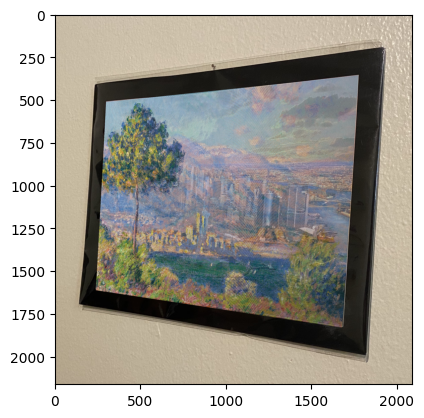

In [16]:
# TODO 2 (10%): Project the source image on the frame
#         formed by v1, v2, v3, and v4 in the target image via direct mapping.
# Display the projection result.

#H = calc_homography(pts_src, pts_dst)
for j in range(ht_src):
    for i in range(wid_src):
        point = np.dot(H,[[i],[j],[1]])
        point = point/point[2,0]
        x = round(point[0,0])
        y = round(point[1,0])
        if y < ht_dst and x< wid_dst:
            #print(img_dst[y,x,:])
            #print(img_src[j,i,:])
            img_dst[y,x,:] = img_src[j,i,:]  

plt.imshow(img_dst[:,:,::-1])

A dtype float64


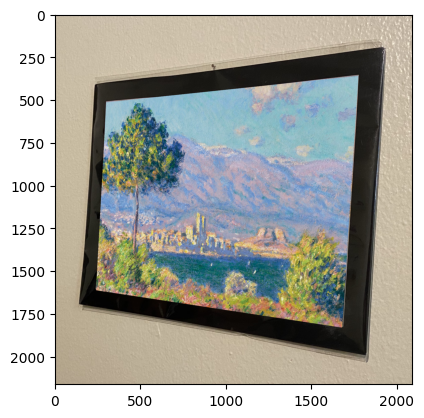

In [34]:
# TODO 3 (20%): Project the source image on the frame
#         formed by v1, v2, v3, and v4 in the target image via inverse mapping.
# Display the projection result.
#H_inv = np.linalg.inv(H)
img_poly = np.zeros((ht_dst, wid_dst),np.uint8)
cv2.fillPoly(img_poly,[pts_dst],(1))

G = calc_homography(pts_dst,pts_src)


for j in range(ht_dst):
    for i in range(wid_dst):
        if img_poly[j,i]>0:
            point = np.dot(G,[[i],[j],[1]])
            point = point/point[2,0]
            x = round(point[0,0])
            y = round(point[1,0])
            if 0<y < ht_src and 0<x< wid_src:
                #print(img_dst[y,x,:])
                #print(img_src[j,i,:])
                img_dst[j,i,:] = img_src[y,x,:]  

plt.imshow(img_dst[:,:,::-1])


In [ ]:
# TODO 4 (10%): Select key points in library1.jpg and library2.jpg.
# Display the selected points in library1.jpg/library2.jpg as shown in assignment3.pdf
img_dst = cv2.imread("library1.jpg")
img_src = cv2.imread("library2.jpg")
# enter the coordinates of the selected points below (Both pts_dst and pts_src are of shape (4,2).)
# pts_dst = ...
# pts_src = ...
# enter your code here

In [ ]:
# TODO 5 (20%): Warping library2.jpg to create img_warp.
# Display the warped result.

In [ ]:
# TODO 6 (5%): Stitching library1.jpg and img_warped.
# Display the stitched result.

In [ ]:
# TODO 7 (10%): Post-processing the stitched result.
# Display the final result.

In [ ]:
# TODO 8 (10%): Complete the same task as in TODO 3, but without using any for loops.
img_src = cv2.imread("monet.jpg")
img_dst = cv2.imread("painting.jpg")
ht_src, wid_src, _ = img_src.shape
ht_dst, wid_dst, _ = img_dst.shape
pts_src = np.array([    [0,0],[wid_src, 0],[wid_src,ht_src], [0,ht_src]])
pts_dst = np.array([[299,515],  [1776,360],     [1680,1834], [239,1615]])
# enter your code here